In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('alistamento_militar_2022.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300914 entries, 0 to 300913
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300914 non-null  int64  
 1   ANO_NASCIMENTO    300914 non-null  int64  
 2   PESO              300914 non-null  float64
 3   ALTURA            300914 non-null  float64
 4   CABECA            300914 non-null  float64
 5   CALCADO           300914 non-null  float64
 6   CINTURA           300914 non-null  float64
 7   MUN_NASCIMENTO    300914 non-null  object 
 8   UF_NASCIMENTO     300914 non-null  object 
 9   PAIS_NASCIMENTO   300914 non-null  object 
 10  ESTADO_CIVIL      300914 non-null  object 
 11  SEXO              300914 non-null  object 
 12  ESCOLARIDADE      300914 non-null  object 
 13  VINCULACAO_ANO    300914 non-null  int64  
 14  DISPENSA          300914 non-null  object 
 15  ZONA_RESIDENCIAL  300914 non-null  object 
 16  MUN_RESIDENCIA    30

In [5]:
df.head()

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
0,1,1995,79.0,181.0,56.0,41.0,88.0,PALMEIRA DAS MISSOES,RS,BRASIL,...,Ensino Médio Completo,2022,Com dispensa,Urbana,CANOAS,RS,BRASIL,10/52 - PALMEIRA DAS MISSOES,PALMEIRA DAS MISSOES,RS
1,2,1974,64.0,165.0,58.0,38.0,75.0,PORTO ALEGRE,RS,BRASIL,...,7° Ano - Ensino Fundamental,2022,Com dispensa,Urbana,ITAJAI,SC,BRASIL,16/28 - ITAJAI,ITAJAI,SC
2,3,1998,55.0,180.0,53.0,41.0,74.0,JANDIRA,SP,BRASIL,...,Ensino Médio Completo,2022,Com dispensa,Urbana,SERTAOZINHO,SP,BRASIL,5/123 - SERTAOZINHO,SERTAOZINHO,SP
3,4,1999,76.0,186.0,57.0,42.0,88.0,CACERES,MT,BRASIL,...,3° Ano - Ensino Médio,2022,Com dispensa,Urbana,CACERES,MT,BRASIL,30/24 - CACERES,CACERES,MT
4,5,2000,76.0,184.0,58.0,42.0,78.0,BRASILIA,DF,BRASIL,...,2° Semestre - Ensino Superior,2022,Com dispensa,Rural,BRASILIA,DF,BRASIL,7/331 - BRASILIA (SAMAMBAIA),BRASILIA,DF


In [6]:
contagem_nascimento= df['UF_NASCIMENTO'].value_counts()

contagem_residencia= df['UF_RESIDENCIA'].value_counts()


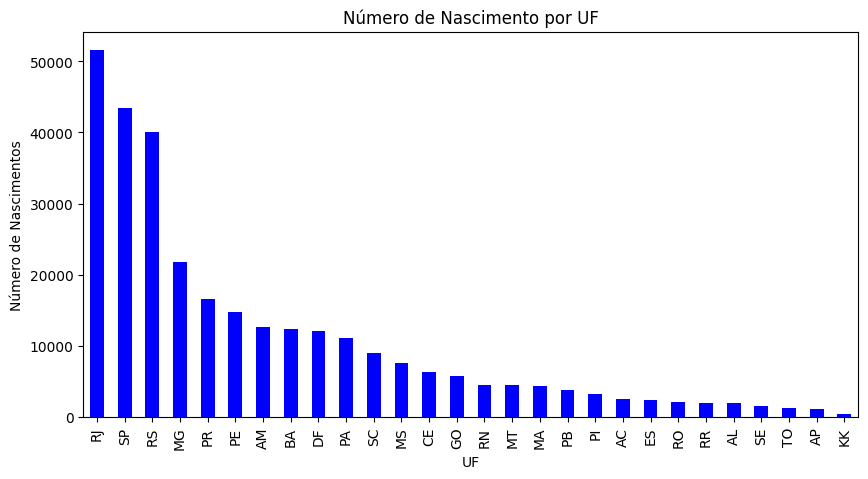

In [7]:
# Gráfico de barras para UF Nascimento
plt.figure(figsize=(10,5))
contagem_nascimento.plot(kind='bar', color= 'blue')
plt.title('Número de Nascimento por UF')
plt.xlabel('UF')
plt.ylabel('Número de Nascimentos')
plt.show()

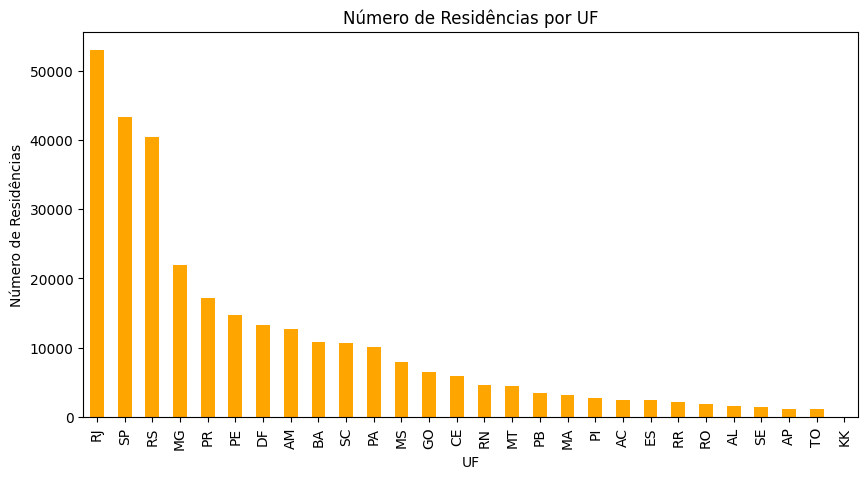

In [8]:
# Gráfico de barras para UF de Residência
plt.figure(figsize=(10,5))
contagem_residencia.plot(kind='bar', color='orange')
plt.title('Número de Residências por UF')
plt.xlabel('UF')
plt.ylabel('Número de Residências')
plt.show()

<Axes: >

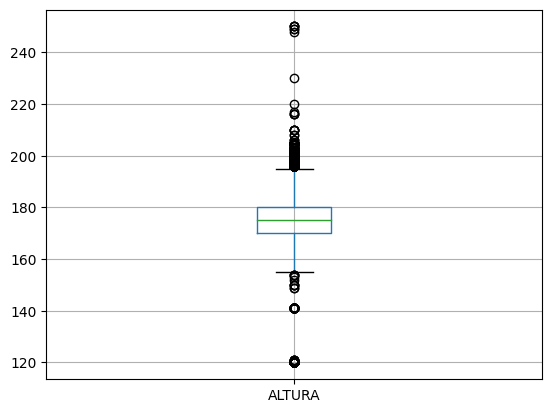

In [9]:
df[['ALTURA']].boxplot()

In [10]:
df['ALTURA'].mode()

0    175.0
Name: ALTURA, dtype: float64

In [11]:
df[['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CALCADO', 'CINTURA']].mean().apply(lambda x: round(x, 2))

ANO_NASCIMENTO    2003.64
PESO                70.13
ALTURA             174.42
CALCADO             40.96
CINTURA             77.29
dtype: float64

In [12]:
df.dropna(subset = ['PESO', 'ALTURA', 'CABECA', 'CALCADO', 'CINTURA'], inplace = True)

In [13]:
dispensas=df['DISPENSA'].value_counts()

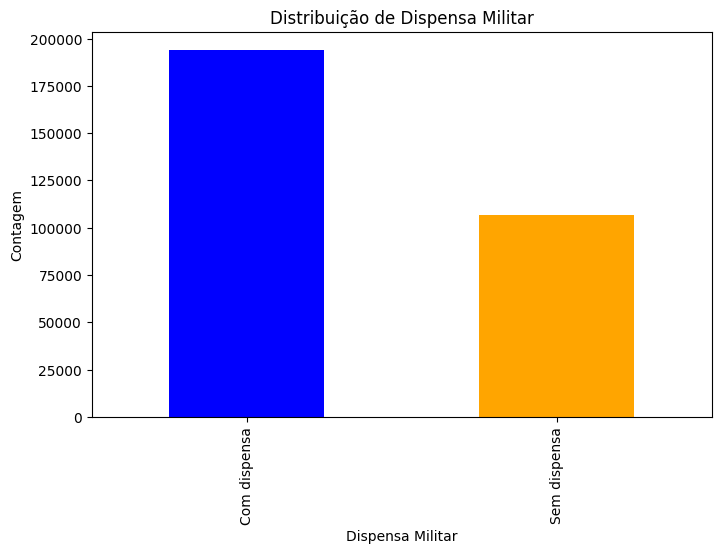

In [14]:
# Distribuição de dispensa militar
plt.figure(figsize=(8,5))
dispensas.plot(kind='bar', color=['blue','orange'])
plt.title('Distribuição de Dispensa Militar')
plt.xlabel('Dispensa Militar')
plt.ylabel('Contagem')
plt.show()

In [15]:
#Alterando a coluna de Id
df.set_index('Unnamed: 0', inplace=True)
df.columns

Index(['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CABECA', 'CALCADO', 'CINTURA',
       'MUN_NASCIMENTO', 'UF_NASCIMENTO', 'PAIS_NASCIMENTO', 'ESTADO_CIVIL',
       'SEXO', 'ESCOLARIDADE', 'VINCULACAO_ANO', 'DISPENSA',
       'ZONA_RESIDENCIAL', 'MUN_RESIDENCIA', 'UF_RESIDENCIA',
       'PAIS_RESIDENCIA', 'JSM', 'MUN_JSM', 'UF_JSM'],
      dtype='object')

In [16]:
#Criando uma coluna com a idade dos alistados no ano que se alistaram 
df['Idade_alistado'] = df['VINCULACAO_ANO'] - df['ANO_NASCIMENTO'] 


In [17]:
#Conferindo alistados acima de 25 anos
alistados_25 = df.loc[df['Idade_alistado'] >= 25, ['MUN_NASCIMENTO','Idade_alistado']]
alistados_25

,MUN_NASCIMENTO,Idade_alistado
Unnamed: 0,,
1,PALMEIRA DAS MISSOES,27
2,PORTO ALEGRE,48
21,SAO PAULO,25
26,SANTANA,25
62,MANACAPURU,27
...,...,...
299528,TEOFILO OTONI,26
300641,GUACUI,26
300736,LIMOEIRO,25


In [18]:
#Media da idade de alistamento
df['Idade_alistado'].mean()

18.362528828834815